<a href="https://colab.research.google.com/github/mkompanek/test/blob/master/TPIV_Kompanek_zadanie_export.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore probability distribution of each variable (histogram, possibly with empirical density and rug plot, box-whiskers plot,...) If X is not distributed normally, can it be achieved by some transformation? Test X for normality, calculate interval estimates of mean value (two-sided) and standard deviation (right-sided).

---

Dataset contains data about patients with Alzheimer's disease from the [TADPOLE](http://adni.loni.usc.edu/tadpole-challenge-dataset-available/) challenge. I extracted 5 columns from 600 patient baseline examinations:
ID - patient's identifier
AGE - patient's AGE
ISMALE - patients' gender
FS_HIPPOCAMPUS - patient's size of hippocampus as number of voxels in MRI scan
MMSE - cognitive test score
DIAG - diagnosis, 0 = healthy, 1 = alzheimer's disease





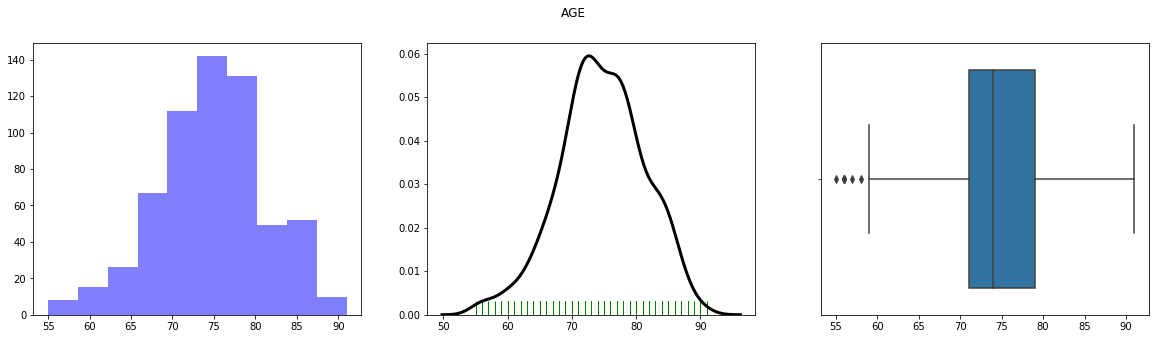

Series name: AGE
Mean: 74
Median: 74.0
Variance: 43
Range: 36
Interquartile range: 8.0
Kurtosis: -0.04718942273191251
Skewness: -0.20983474997577656
Mean interval 1 (95%): 73.47944364846995
Mean interval 2 (95%): 74.52055635153005
Left sided SD interval D (95%): 6.263868920615421
Right sided SD interval H (95%): 6.882424167810602
---------------------------
Testing normality for series(Shapiro-Wilk): AGE
	Sample does not look Gaussian (reject H0)
Testing normality for series after Box cox(Shapiro-Wilk): AGE
	Box Cox transformed sample does not look Gaussian (reject H0)


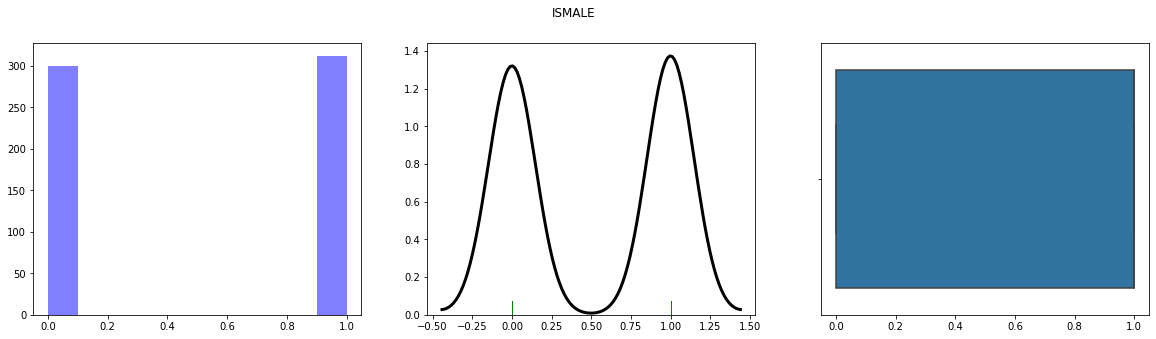

Series name: ISMALE
Mean: 0
Median: 1.0
Variance: 0
Range: 1
Interquartile range: 1.0
Kurtosis: -1.9984615384615385
Skewness: -0.03922322702763657
Mean interval 1 (95%): 0.0
Mean interval 2 (95%): 0.0
Left sided SD interval D (95%): 0.0
Right sided SD interval H (95%): 0.0
---------------------------
Testing normality for series(Shapiro-Wilk): ISMALE
	Sample does not look Gaussian (reject H0)
Testing normality for series after Box cox(Shapiro-Wilk): ISMALE
	Box Cox transformed sample does not look Gaussian (reject H0)


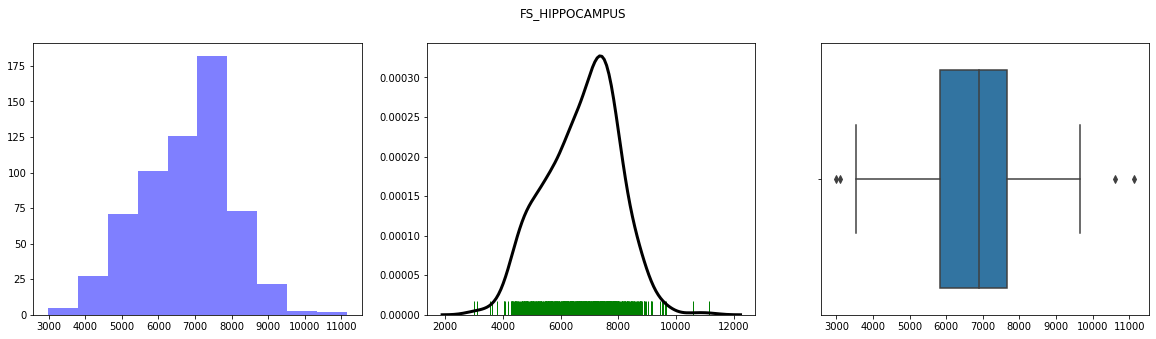

Series name: FS_HIPPOCAMPUS
Mean: 6739
Median: 6893.5
Variance: 1561658
Range: 8152
Interquartile range: 1820.5
Kurtosis: -0.21048874342887425
Skewness: -0.19853225270264072
Mean interval 1 (95%): 6639.796615935234
Mean interval 2 (95%): 6838.203384064766
Left sided SD interval D (95%): 1193.7170537574407
Right sided SD interval H (95%): 1311.5962681257215
---------------------------
Testing normality for series(Shapiro-Wilk): FS_HIPPOCAMPUS
	Sample does not look Gaussian (reject H0)
Testing normality for series after Box cox(Shapiro-Wilk): FS_HIPPOCAMPUS
	Box Cox transformed sample does not look Gaussian (reject H0)


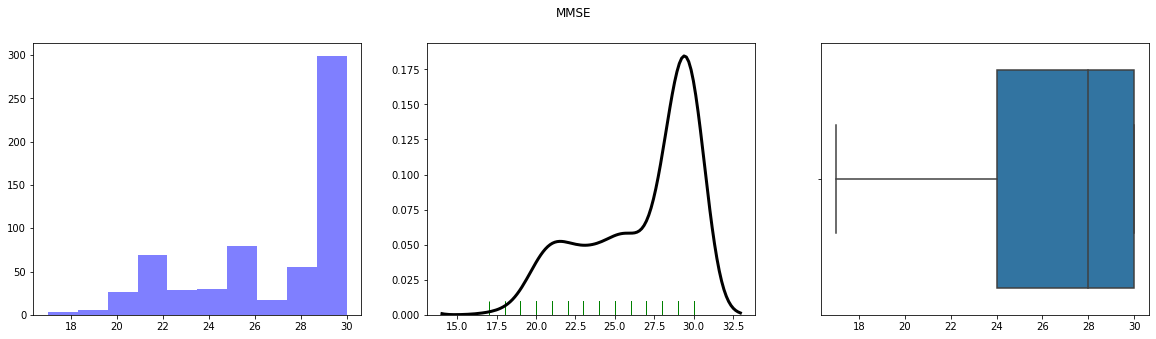

Series name: MMSE
Mean: 26
Median: 28.0
Variance: 11
Range: 13
Interquartile range: 6.0
Kurtosis: -0.7021665197457772
Skewness: -0.8020392412915877
Mean interval 1 (95%): 25.736712728016727
Mean interval 2 (95%): 26.263287271983273
Left sided SD interval D (95%): 3.1681429980102154
Right sided SD interval H (95%): 3.480996204250578
---------------------------
Testing normality for series(Shapiro-Wilk): MMSE
	Sample does not look Gaussian (reject H0)
Testing normality for series after Box cox(Shapiro-Wilk): MMSE
	Box Cox transformed sample does not look Gaussian (reject H0)


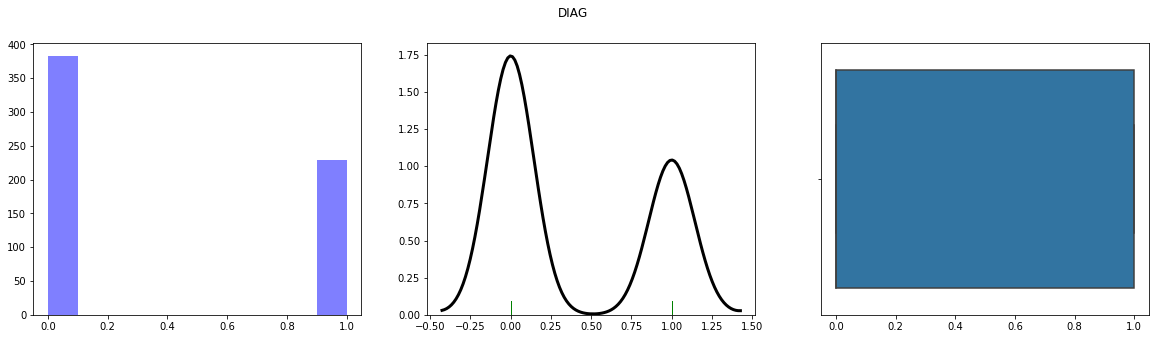

Series name: DIAG
Mean: 0
Median: 0.0
Variance: 0
Range: 1
Interquartile range: 1.0
Kurtosis: -1.7295996898765202
Skewness: 0.5200002981955677
Mean interval 1 (95%): 0.0
Mean interval 2 (95%): 0.0
Left sided SD interval D (95%): 0.0
Right sided SD interval H (95%): 0.0
---------------------------
Testing normality for series(Shapiro-Wilk): DIAG
	Sample does not look Gaussian (reject H0)
Testing normality for series after Box cox(Shapiro-Wilk): DIAG
	Box Cox transformed sample does not look Gaussian (reject H0)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
from scipy import stats
import statistics 
import math
from scipy.stats import iqr, kurtosis, skew, norm, t, chi2
import datetime as dt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('https://raw.githubusercontent.com/mkompanek/test/master/data2.csv')

#1.1. Explore probability distribution of each variable (histogram, possibly with empirical density and rug plot, box-whiskers plot,...) 
def GenerateCharts(values, name):
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.suptitle(name)
    fig.set_figheight(5)
    fig.set_figwidth(20)
    
    num_bins = 10
    ax1.hist(values, num_bins, facecolor='blue', alpha=0.5)
    
    sns.distplot(values, rug=True, hist=False, rug_kws={"color": "g"}, kde_kws={"color": "k", "lw": 3}, ax = ax2)
    sns.boxplot(values, ax = ax3)
    plt.show()
    
#1.1.and qantify its sample characteristics (measures of location, variability, shape). Guess parametric type of population distribution. 
def ComputeCharacteristics(values, name):
    
    n = len(values)
    mean = statistics.mean(values) 
    median = statistics.median(values)
    variance = statistics.variance(values)
    sd = statistics.stdev(values)
    rng = max(values) - min(values)
    i = iqr(values, rng=(25,75), interpolation='midpoint')
    kurt = kurtosis(values)
    sk = skew(values)

    alfa = 0.05

    interval1 = mean - t.ppf(1 - alfa/2, df = n - 1) * sd / math.sqrt(n) 
    interval2 = mean + t.ppf(1 - alfa/2, df = n - 1) * sd / math.sqrt(n) 

    sd_interval1 = math.sqrt((n - 1) / chi2.ppf(1 - alfa / 2, df = n - 1)) * sd
    sd_interval2 = math.sqrt((n - 1) / chi2.ppf(alfa / 2, df = n - 1)) * sd

    left_sided_sd = math.sqrt((n - 1) / chi2.ppf(1 - alfa, df = n - 1) ) * sd
    right_sided_sd = math.sqrt((n - 1) / chi2.ppf(alfa, df = n - 1) ) * sd

    print('Series name: ' + name)
    print('Mean: ' + str(mean))
    print('Median: ' + str(median))
    print('Variance: ' + str(variance))
    print('Range: ' + str(rng))
    print('Interquartile range: ' + str(i))
    print('Kurtosis: ' + str(kurt))
    print('Skewness: ' + str(sk))
    print('Mean interval 1 (95%): ' + str(interval1))
    print('Mean interval 2 (95%): ' + str(interval2))
    print('Left sided SD interval D (95%): ' + str(left_sided_sd))
    print('Right sided SD interval H (95%): ' + str(right_sided_sd))
    print('---------------------------')

# 1.2. If X is not distributed normally, can it be achieved by some transformation?
# Test X for normality, calculate interval estimates of mean value (two-sided) and standard deviation (right-sided). 
# Formulate a statistical hypothesis (regarding X), calculate test statistics, show p-value (visually) and make a correct statement (is there an evidence based on the sample?). 
def TestNormality(values, name):
    
    print('Testing normality for series(Shapiro-Wilk): ' + name)
    from scipy.stats import shapiro
    
    s, p = shapiro(values)
    
    if p > 0.05:
        print('\tSample looks Gaussian (fail to reject H0)')
    else:
        print('\tSample does not look Gaussian (reject H0)')
    
    from scipy.stats import shapiro, boxcox

    values_min = np.amin(values) + 1
    positive_values = values + values_min    
    xt, _ = boxcox(positive_values)

    print('Testing normality for series after Box cox(Shapiro-Wilk): ' + name)
    s, p = shapiro(xt)
    
    if p > 0.05:
        print('\tBox Cox transformed sample looks Gaussian (fail to reject H0)')
    else:
        print('\tBox Cox transformed sample does not look Gaussian (reject H0)')

for i in range(1, len(df.columns)):
    GenerateCharts(df[df.columns[i]].values, df.columns[i])
    ComputeCharacteristics(df[df.columns[i]].values, df.columns[i])
    TestNormality(df[df.columns[i]].values, df.columns[i])

Guessed types of distributions:
* AGE - normal
* ISMALE - bernoulli
* DIAG - bernoulli
* FS_HIPPOCAMPUS - normal
* MMSE - beta


# Formulate a statistical hypothesis (regarding X), calculate test statistics, show p-value (visually) and make a correct statement (is there an evidence based on the sample?).


---


Let's examine hippocampal size in people with / without Alzheimer's disease.

Our H0 = Hippocampal size does not matter / mean size of hippocampus is not different.

Low p indicates we can reject H0, thus hippocampal size is valid predictor of Alzheimer's disease




Results: t = 19.5018  p = 3.23509e-61


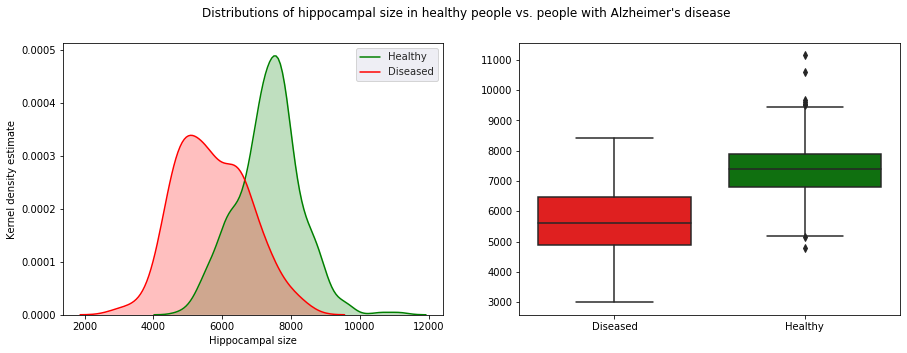

In [2]:
healthy_people_rows = df.loc[df['DIAG'] == 0]
diseased_people_rows = df.loc[df['DIAG'] == 1]

healthy = healthy_people_rows['FS_HIPPOCAMPUS'].values
diseased = diseased_people_rows['FS_HIPPOCAMPUS'].values

n1 = len(healthy)
mean1 = statistics.mean(healthy) 
sd1 = statistics.stdev(healthy)

n2 = len(diseased)
mean2 = statistics.mean(diseased) 
sd2 = statistics.stdev(diseased)

#t = (mean1 - mean2) / (math.sqrt((math.pow(sd1, 2) / n1) + (math.pow(sd2, 2) / n2))) 

from scipy.stats import ttest_ind_from_stats

t2, p2 = ttest_ind_from_stats(mean1, sd1, n1, mean2, sd2, n2, equal_var=False)

print("Results: t = %g  p = %g" % (t2, p2))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Distributions of hippocampal size in healthy people vs. people with Alzheimer's disease ")
fig.set_figheight(5)
fig.set_figwidth(15)
sns.set_style("dark")    
sns.distplot(healthy, hist=False, color="g", kde_kws={"shade": True}, ax=ax1, label="Healthy") 
sns.distplot(diseased, hist=False, color="r", kde_kws={"shade": True}, ax=ax1, label="Diseased") 

ax = sns.boxplot(data=[diseased, healthy], palette={0: "r", 1: "g"})
ax.set_xticklabels(["Diseased", "Healthy"])
ax1.set(xlabel='Hippocampal size', ylabel='Kernel density estimate')
plt.show()

# Choose a set of related random variables given that independent observations are available. Describe the variables and indicate their roles (quantitative response, predictors). Design several linear (and possibly nonlinear) models by a choice of regression function and set of predictors, judge their significance, compare in-sample and out-of-sample fit. Consider including one or more interaction terms, explain their role and significance.

---

I am using all columns (AGE, GENDER, HIPPOCAMPAL VOLUME, MMSE) to fit a logistic regression, since data which we are trying to fit are categorical (healthy (0) / Alzheimer's disease (1)).

Description of columns:
*   AGE - older people tend to have more Alzheimer's disease symptoms(forgetfullness, cognitive decline), brain gets overall smaller in volume due to aging
*   GENDER - as far as I know, women are more likely to have Alzheimer's disease (this data says otherwise)
*   HIPPOCAMPAL VOLUME - volume of brain structure called hippocampus which is responsible for formation of new memories, first area where structural change is observable in early stage Alzheimer's disease
*   MMSE - Mini-Mental State Exam, questionnaire test measuring cognitive performance, high values indicate no cognitive impairments (max 30, min 0), lower values indicate cognitive impairment

Data was split randomly to train and test set (2/3 vs 1/3).
All columns were normalized to zero mean and unit variance.

Models trained on all columns achieve around 97 % accuracy both on train and test (depending on how data was split), relying mostly on MMSE score (large negative coefficient).
If I omit the MMSE column, accuracy drops to around 80 %. Then, the model using only age and gender, achieves accuracy of around 51 % (thus no reasonable correlations with age and gender).

As expected, MMSE as direct measurement of cognitive performance contributed to best model's results.




In [3]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing

X = df.iloc[:, 1:5].values
y = df.iloc[:, 5:6].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
 
regressor = sm.Logit(y_train, X_train)
result = regressor.fit()

print(result.summary())

accuracy = accuracy_score(y_train, np.round(result.predict(X_train)))
print('Accuracy(Train)) ' + str(accuracy))

accuracy = accuracy_score(y_test, np.round(result.predict(X_test)))
print('Accuracy(Test)) ' + str(accuracy))

print('Confusion matrix:')
print(confusion_matrix(y_test, np.round(result.predict(X_test))))

Optimization terminated successfully.
         Current function value: 0.075162
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  410
Model:                          Logit   Df Residuals:                      406
Method:                           MLE   Df Model:                            3
Date:                Tue, 11 Feb 2020   Pseudo R-squ.:                  0.8851
Time:                        10:21:14   Log-Likelihood:                -30.816
converged:                       True   LL-Null:                       -268.13
Covariance Type:            nonrobust   LLR p-value:                1.502e-102
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.6286      0.410     -1.534      0.125      -1.432       0.174
x2             0.0361      0

# Decompose the joint probability distribution of selected quantitative random variables into marginal distributions and copula: suggest suitable paremaetric families, estimate their parameters, perform goodness-of-fit test, choose a winner and build joint cumulative distribution function or density that can be used for prediction purposes. What do you infer about dependence structure of the random vector from visualisation of its copula ?

---

Following part is implemented in R (I couldn't even fit marginals in python for some reason).
In the following section I am working with 2 continous variables: AGE and size of hippocampus (FS_HIPPOCAMPUS).
I am using automatic bivariate copula selection.
What do I infer: not much, since the correlation is really weak, it looks more like independence.


In [0]:
%%script false --no-raise-error
library(dplyr)
library(lmomco)
library(copula)
library(VineCopula)

# data read
dat <- read.table(file="https://raw.githubusercontent.com/mkompanek/test/master/data2.csv", header = T, sep=",")
dat$ID <- NULL
dat$ISMALE <- NULL
dat$MMSE <- NULL
dat$DIAG <- NULL

ages <- dat$AGE
hips <- dat$FS_HIPPOCAMPUS

plot(ages, hips, pch='.')
abline(lm(hips~ages),col='blue',lwd=1)
cor(ages,hips,method='spearman') # weak negative correlation


################################## COPULA START ######################################################
u <- pobs(as.matrix(cbind(ages, hips)))[,1]
v <- pobs(as.matrix(cbind(ages, hips)))[,2]

plot(u, v, pch='.')
selectedCopula <- BiCopSelect(u,v,familyset=NA) # automatic selection of bivariate copula
selectedCopula

fc <- frankCopula(dim = 2)

u <- pobs(as.matrix(cbind(ages, hips)))
fitCopulaResult <- fitCopula(fc, u, method='ml')

u <- rCopula(30000, fitCopulaResult@copula)
plot(u[,1],u[,2],pch='.',col='blue')

################################## COPULA END ######################################################


################################## MARGINALS START ######################################################
# all adopted from materials
fit <- list()  # container

distr_names <- c("gev", "ln3", "pe3", "wei")

Lmoments <- lapply(dat, lmoms)  # L-moments from data
fit$parameters <- lapply(Lmoments, function(x)   # distribution parameters from L-moments
  sapply(distr_names, 
         FUN = function(y) do.call(paste0("par", y), args=list(lmom=x, zeta=0)),
         simplify = FALSE
  )
)

gof <- sapply(names(fit$parameters), function(x)
  sapply(names(fit$parameters[[x]]), 
         FUN = function(y) {
           cdf <- function(z) do.call(paste0("cdf", y), args = list(x=z, para=fit$parameters[[x]][[y]]))
           goftest::cvm.test(dat[[x]], cdf)[c("statistic","p.value")] %>% unlist() %>% unname() %>% 
             'names<-'(c("test.stat", "p-value")) %>% round(3)
         }
  ),
  simplify = FALSE
)
gof

marginals_fit <- mapply('[[',
                        fit$parameters,
                        sapply(gof, function(x) which.min(x["test.stat",])),
                        SIMPLIFY = F
)
sapply(marginals_fit, '[[', y="type")  # last check of correct class sellection

################################## MARGINALS END ######################################################

pdf <- function(x) {
  pdf_val <- mapply(dlmomco, x=x, para=marginals_fit)
  cdf_val <- mapply(plmomco, x=x, para=marginals_fit)
  dCopula(rbind(cdf_val), copula= fitCopulaResult@copula)*prod(pdf_val)
}

pdf(sapply(dat,median))

![alt text](https://github.com/mkompanek/test/raw/master/image1.png)
![alt text](https://github.com/mkompanek/test/raw/master/image2.png)
![alt text](https://github.com/mkompanek/test/raw/master/image3.png)

# Find a time series of your preference, split it to training and evaluation set and perform the following tasks.

---


Chosen time series = Monthly data of S&P 500 stock index

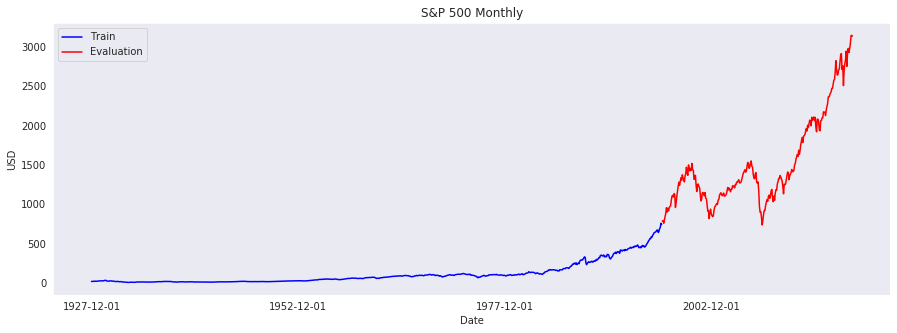

In [5]:
all_data = pd.read_csv('https://raw.githubusercontent.com/mkompanek/test/master/SP500.csv', index_col='Date', usecols=['Date', 'Close'])

# train test split
SPLIT = int(0.75 * len(all_data))
train = all_data[:SPLIT]
evaluation = all_data[SPLIT:]

plt.figure(figsize=(15, 5))
plt.plot(train.index.values, train['Close'].values, 'b', label="Train")
plt.plot(evaluation.index.values, evaluation['Close'].values, 'r', label="Evaluation")
plt.ylabel('USD')
plt.xlabel('Date')
plt.legend(loc="upper left")
plt.title('S&P 500 Monthly')
plt.gca().get_xaxis().set_major_locator(ticker.MultipleLocator(300))
plt.show()

# Identify structure of the time series and estimate model of trend, seasonal, cyclic and residual components.

---


Due to exponential shape, first I convert data to log scale. Then I apply simple linear regression.

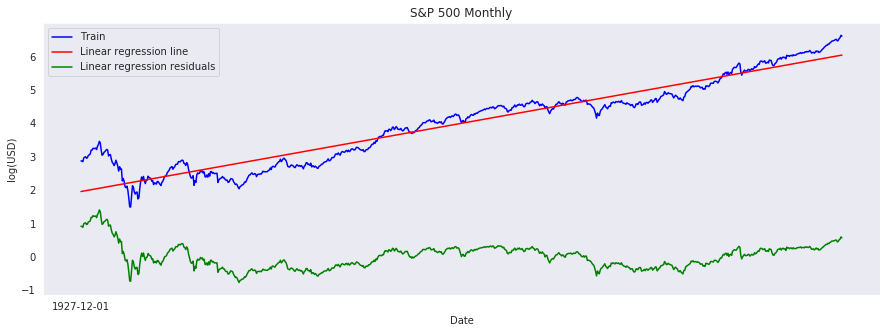

In [6]:
x = pd.to_datetime(train.index.values).map(dt.datetime.toordinal).values.reshape(-1, 1)
y = train['Close'].values.reshape(-1, 1)
y = np.log(y)

reg = LinearRegression()
reg.fit(x, y)

linear_predicted_y = reg.predict(x)
residuals = y - linear_predicted_y

plt.figure(figsize=(15, 5))
plt.plot(train.index.values, y, 'b', label="Train")
plt.plot(train.index.values, linear_predicted_y, 'r', label="Linear regression line")
plt.plot(train.index.values, residuals, 'g', label="Linear regression residuals")
plt.ylabel('log(USD)')
plt.xlabel('Date')
plt.legend(loc="upper left")
plt.title('S&P 500 Monthly')
plt.gca().get_xaxis().set_major_locator(ticker.MultipleLocator(3000))
plt.show()

On the residuals of linear regression, I apply FFT.
Spectral filtering threshold was fine tuned manually.

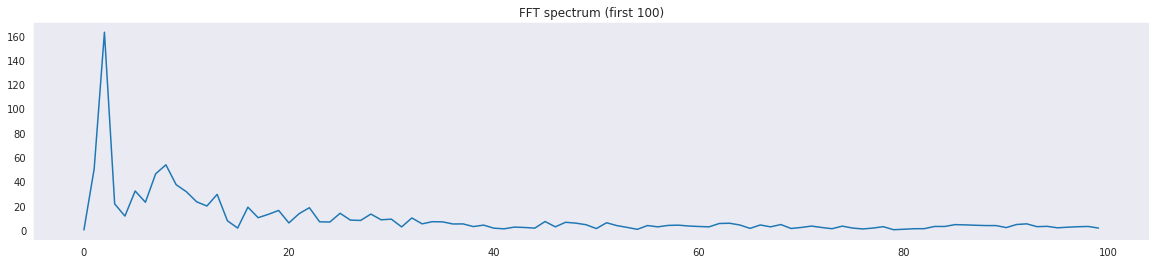

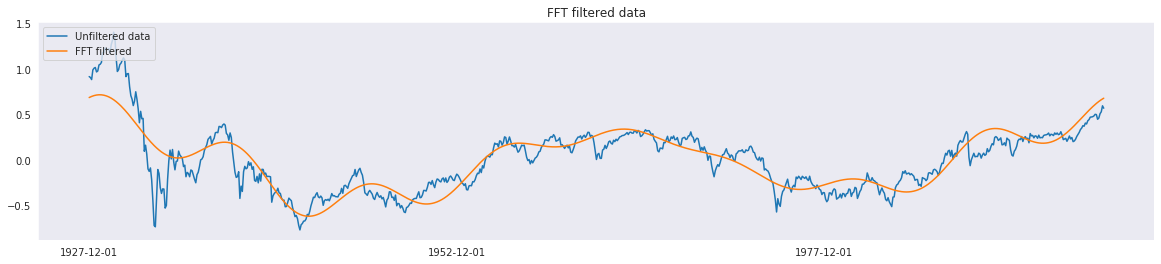

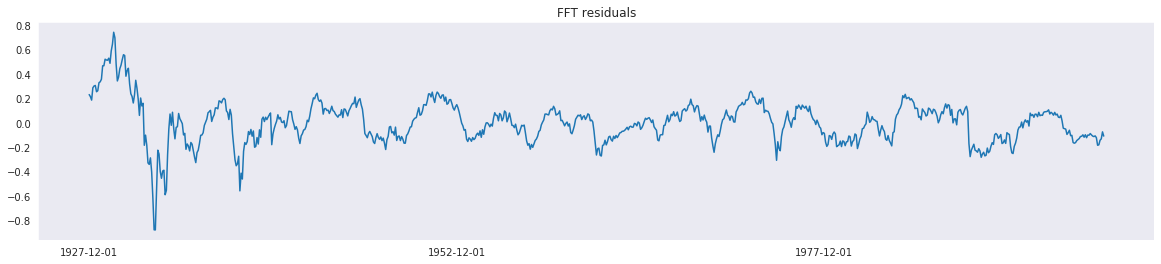

Durbin watson test:
0.1094329501720962
Residuals seem still to be correlated, this could be avoided by lowering FFT filtering threshold. However, then result seemed heavily overfitted.


In [7]:
y = residuals

def PrintSeconds(seconds):
    years = seconds // 31539456
    seconds = seconds % 31539456
    months = seconds // 2628288
    seconds = seconds % 2628288
    days = seconds // 86400
    seconds = seconds % 86400
    hours = seconds // 3600
    seconds = seconds % 3600
    minutes = seconds // 60
    seconds = seconds % 60

    if (years > 0):
        print(str(years) + ' years', end=' ')
    if (months > 0):
        print(str(months) + ' months', end=' ')
    if (days > 0):
        print(str(days) + ' days', end=' ')
    if (hours > 0):
        print(str(hours) + ' hours', end=' ')
    if (minutes > 0):
        print(str(minutes) + ' minutes', end=' ')
    print()


SAMPLE_PERIOD_SECONDS = 1 * 30.24* 24 * 60 * 60
SAMPLING_FREQUENCY = 1 / SAMPLE_PERIOD_SECONDS
FREQ_PER_BIN = SAMPLING_FREQUENCY / len(y)

f = np.fft.fft(y.reshape(-1))

plt.figure(figsize=(20, 4))
plt.plot(abs(f[:100]))
plt.title('FFT spectrum (first 100)')

# FFT filtering
for i in range(1, len(f)):
    if(abs(f[i]) < 40):
        f[i] = 0
    else:
        frequency = FREQ_PER_BIN * i
        period = (1.0 / frequency)
        #print('Keeping period: ', end="")
        #PrintSeconds(period)

inverse = np.fft.ifft(f).real

plt.figure(figsize=(20, 4))
plt.plot(train.index.values, y, label="Unfiltered data")
plt.plot(train.index.values, inverse, label="FFT filtered")
plt.legend(loc="upper left")
plt.gca().get_xaxis().set_major_locator(ticker.MultipleLocator(300))
plt.title('FFT filtered data')
plt.show()

residuals2 = y.reshape(-1) - inverse.reshape(-1)

plt.figure(figsize=(20, 4))
plt.plot(train.index.values, residuals2)
plt.gca().get_xaxis().set_major_locator(ticker.MultipleLocator(300))
plt.title('FFT residuals')
plt.show()

from statsmodels.stats.stattools import durbin_watson
print('Durbin watson test:')
print(str(durbin_watson(residuals2.reshape(-1))))
print('Residuals seem still to be correlated, this could be avoided by lowering FFT filtering threshold. However, then result seemed heavily overfitted.')

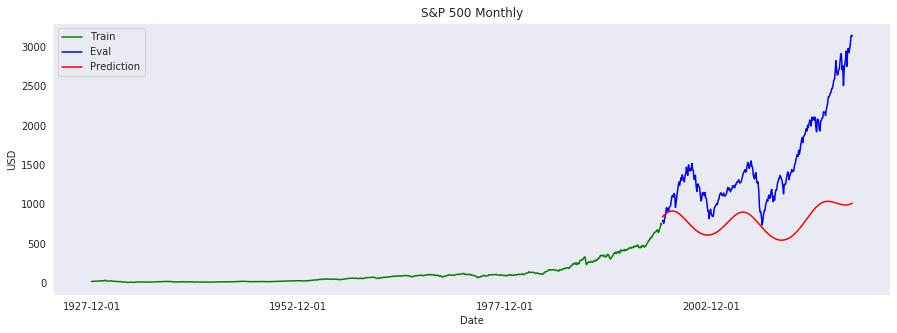

In [13]:
train_x = pd.to_datetime(train.index.values).map(dt.datetime.toordinal).values.reshape(-1, 1)
train_y = train['Close'].values.reshape(-1, 1)

eval_x = pd.to_datetime(evaluation.index.values).map(dt.datetime.toordinal).values.reshape(-1, 1)
eval_y = evaluation['Close'].values.reshape(-1)

l1 = reg.predict(train_x).reshape(-1)
l2 = reg.predict(eval_x).reshape(-1)

l1 = np.exp(l1 + inverse)
l2 = np.exp(l2  + inverse[:len(evaluation.index.values)].reshape(-1))

plt.figure(figsize=(15, 5))
plt.plot(train.index.values, train_y, 'g', label="Train")
plt.plot(evaluation.index.values, eval_y, 'b', label="Eval")
plt.plot(evaluation.index.values, l2, 'r', label="Prediction")
plt.ylabel('USD')
plt.xlabel('Date')
plt.legend(loc="upper left")
plt.title('S&P 500 Monthly')
plt.gca().get_xaxis().set_major_locator(ticker.MultipleLocator(300))
plt.show()

# Is the trend deterministic or could it be stochastic? Identify and estimate SARIMA model. Finally, compare it with the decomposition model with respect to their fitting and predicting performance but also their complexity and iterpretability.

---
Probably stochastic.
In the following I searched throught possible configurations via brute-force, then picked the best model via BIC.




In [0]:
from math import sqrt
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

def sarima_configs(seasonal=[0, 1, 3, 6, 12]):
    models = list()
    
    p_params = [0, 1, 2]
    d_params = [0, 1]
    q_params = [0, 1, 2]
    t_params = ['n','c','t','ct']
    P_params = [0, 1, 2]
    D_params = [0, 1]
    Q_params = [0, 1, 2]
    m_params = seasonal
    
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in P_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p,d,q), (P,D,Q,m), t]
                                    models.append(cfg)
    return models

train_y = train['Close'].values.reshape(-1, 1)    
eval_y = evaluation['Close'].values.reshape(-1, 1)

cfg_list = sarima_configs()

runOptimize = False
if (runOptimize):
  import sys

  min_bic = sys.float_info.max  
  index = 0
  for cfg in cfg_list:
      order, sorder, trend = cfg
      index = index + 1
      with catch_warnings():
          filterwarnings("ignore")
          try:
              if (index%20 == 0):
                print("Progress: " + str(index) + " / " + str(len(cfg_list)))
              model = SARIMAX(train_y, order=order, seasonal_order=sorder, trend=trend)
              model_fit = model.fit(disp=False)
              bic = model_fit.bic
                                        
              if (bic < min_bic):
                  min_bic = bic
                  best_config_by_bic = cfg
                  print('New min by bic: ' + str(index))
              
          except:
              print(end="")
  print()


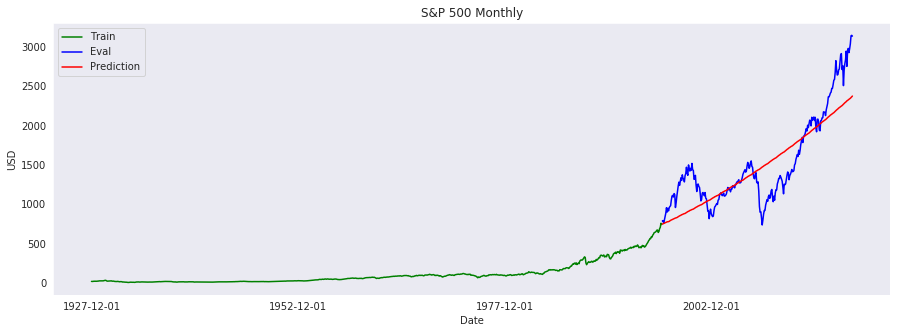

In [10]:
best_config_by_bic = cfg_list[1314]
order, sorder, trend = best_config_by_bic
model = SARIMAX(train_y, order=order, seasonal_order=sorder, trend=trend)
model_fit_bic = model.fit(disp=False)

prediction = model_fit_bic.forecast(len(eval_y)).reshape(-1, 1)

plt.figure(figsize=(15, 5))
plt.plot(train.index.values, train_y, 'g', label="Train")
plt.plot(evaluation.index.values, eval_y, 'b', label="Eval")
plt.plot(evaluation.index.values, prediction, 'r', label="Prediction")
plt.ylabel('USD')
plt.xlabel('Date')
plt.legend(loc="upper left")
plt.title('S&P 500 Monthly')
plt.gca().get_xaxis().set_major_locator(ticker.MultipleLocator(300))
plt.show()